In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from copy import copy
from matplotlib.colors import LogNorm
#from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator

from process_functions import *

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']

### Load Processed Data

In [2]:
#Data Unfolded From Rapgap
cuts_h1rpgp       = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp     = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]

#nn_weights_h1rpgp = np.load("../models/Rapgap_FasterLR_Patience20_NNweights_step2_iteration_13.npy")[cuts_h1rpgp]
#nn_weights_h1rpgp = np.load("Iter20_nominal_Feb14.npy")[cuts_h1rpgp]

weights_h1rpgp = mc_weights_h1rpgp*nn_weights_h1rpgp

In [3]:
#Data Unfolded From Django
cuts       = np.load('cuts.npy')
jet_pT     = np.load('jet_pT.npy')[cuts]
q_perp     = np.load('q_perp.npy')[cuts]
asymm_phi  = np.load('asymm_angle.npy')[cuts]
weights    = np.load('weights.npy')[cuts]
mc_weights = np.load("mc_weights.npy")[cuts]
nn_weights = np.load("nn_weights.npy")[cuts]

#nn_weights = np.load("../models/Django_FasterLR_Patience20_NNweights_step2_iteration_13.npy")[cuts]

#nn_weights = np.load("../models/Django_NNweights_step2_iteration_{}.npy".format(iteration))[cuts]
weights = mc_weights*nn_weights

In [4]:
print(len(cuts_h1rpgp))
print(len(jet_pT_h1rpgp))
print(q_perp_h1rpgp)
print(q_perp)

54120771
8059737
[2.9258978 2.8795211 1.8521012 ... 0.9344905 2.9365401 1.597804 ]
[0.79072815 1.8506364  1.992722   ... 0.2749079  2.0112276  0.2778641 ]


### Load RapGap

In [5]:
rapgap_cuts      = np.load('rapgap_cuts.npy')
rapgap_jet_pT    = np.load('rapgap_jet_pT.npy')[rapgap_cuts]
rapgap_q_perp    = np.load('rapgap_q_perp.npy')[rapgap_cuts]
rapgap_asymm_phi = np.load('rapgap_asymm_angle.npy')[rapgap_cuts]
rapgap_weights   = np.load('rapgap_weights.npy')[rapgap_cuts]

In [6]:
raw_cuts = np.load("dataRaw_cuts.npy")
raw_q_perp = np.load("dataRaw_q_perp.npy")

cut_on_raw=True
if cut_on_raw:
    raw_q_perp=raw_q_perp[raw_cuts]

### Apply Cuts

In [7]:
if (len(q_perp) == len(cuts)):
    jet_pT    = jet_pT[cuts]
    q_perp    = q_perp[cuts]
    asymm_phi = asymm_phi[cuts]
    weights   = weights[cuts]
    mc_weights = mc_weights[cuts]
    nn_weights = nn_weights[cuts]
    print("%i / %i Events Remain"%(len(q_perp),len(cuts)))

else:
    print("Cuts already applied!")
    

Cuts already applied!


___

## Calculate Bin Average $\cos(\phi), \cos(2\phi)$, and $\cos(3\phi)$ in Bins of $q_\perp$

### Dictionaryies and Binning

In [8]:
#Make Dictionaries and Binning
#N_Bins = 10
q_max = 10.0
q_perp_bins = np.array([ 0., 1., 2., 3., 4., 5., 6., 8., 10.])
N_Bins = len(q_perp_bins)-1
digits = np.digitize(q_perp,q_perp_bins)-1
keys=["q_perp","phi","cos1","cos2","cos3"]

In [9]:
django = {}
averages_in_qperp_bins(django, q_perp_bins, q_perp, asymm_phi, mc_weights)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


In [10]:
rapgap = {}
averages_in_qperp_bins(rapgap, q_perp_bins, rapgap_q_perp, rapgap_asymm_phi, rapgap_weights)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


In [11]:
#Data unfolded USING Django
h1_djgo = {}
averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp, asymm_phi, weights)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


## Dictionary of Unfolded H1 Data (Main results use RAPGAP)

In [12]:
#Data unfolded USING Rapgap
h1_rpgp = {}
averages_in_qperp_bins(h1_rpgp, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp, weights_h1rpgp)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


# Uncertainties (Stat. and Sys.)

In [13]:
file = open('bootstrap_errors.pkl', 'rb')
bootstrap_errors = pickle.load(file)
file.close()

In [14]:
bootstrap_errors['cos1']

array([0.00147015, 0.00278451, 0.00407597, 0.00565865, 0.00825394,
       0.01013296, 0.01248486, 0.01718984])

In [15]:
file = open('systematics.pkl', 'rb')
systematics = pickle.load(file)
file.close()

In [16]:
stat_and_sys_error = {}
for key in keys[1:]:
    #stat_and_sys_error[key] = np.sqrt((bootstrap_errors[key]*h1_rpgp[key])**2+systematics['total'][key]**2)
    stat_and_sys_error[key] = systematics['total'][key]

In [17]:
x_low =  h1_rpgp["q_perp"] - q_perp_bins[:-1]
x_high = q_perp_bins[1:] - h1_rpgp["q_perp"]
x_errors = np.array(list(zip(x_low,x_high))).T
edges=np.stack((q_perp_bins[:-1],q_perp_bins[1:])).T

___

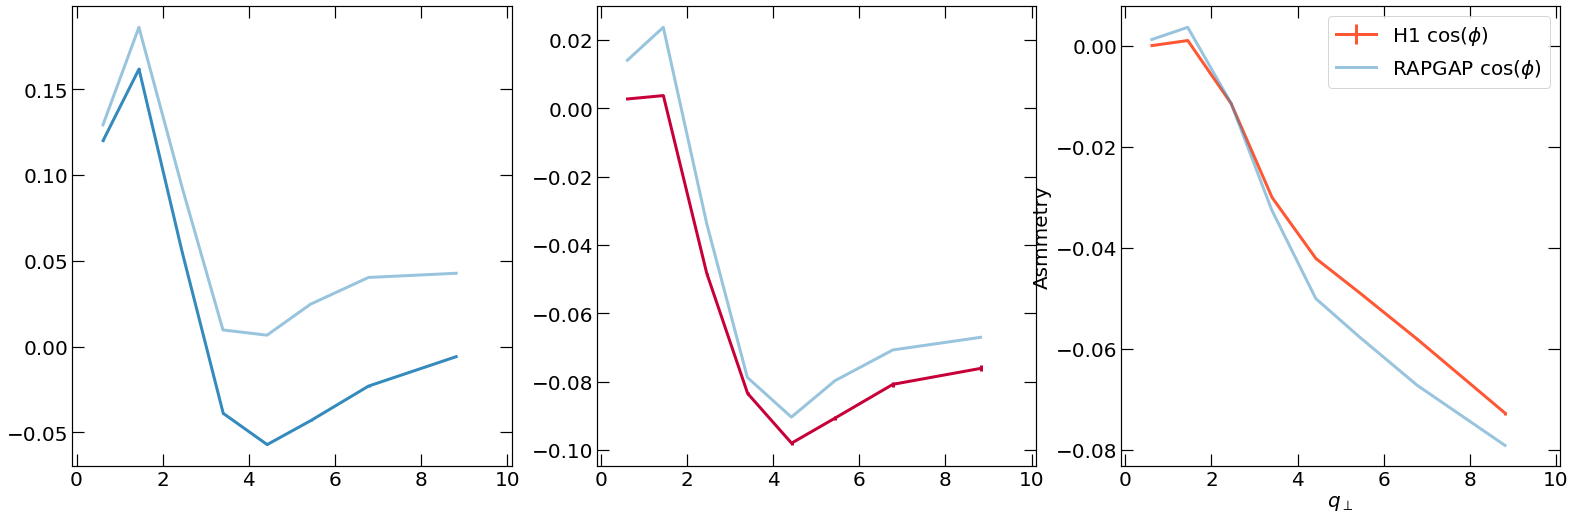

In [18]:
fig,axes = plt.subplots(1,3,figsize=(22,7))

for i,key in enumerate(["cos1","cos2","cos3"]):
    axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],label="H1 $\cos(\phi)$",color=colors[i],linewidth=3)
    axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP $\cos(\phi)$",alpha=0.5,linewidth=3)
    axes[i].set_xlim(-0.1,10.1)

plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")

___

## Theory https://arxiv.org/pdf/2106.05307.pdf

In [19]:
theory = {}

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("theory_cos%iphi.npy"%(i))
    theory[key] = theory[key]/i #paper plots n<cos(nphi)>
    key = key+"_x"
    theory[key] = np.load("theory_cos%iphi_x.npy"%(i))
    
    #theory, 5 points matching H1 <q_perp>, for ratios
    key = "for_ratio_cos%i"%(i)
    theory[key] = np.load("theory_for_ratio_cos%iphi.npy"%i)
    theory[key] = theory[key]/i #paper plots n<cos(nphi)>
    key = key+"_x"
    theory[key] = np.load("theory_for_ratio_cos%iphi_x.npy"%i)

## Pythia [Roli+Kyle]

In [20]:
old_pythia = {}

for i in range(1,4):
    key = "cos%i"%(i)
    old_pythia[key] = np.genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,1]
    key = key+"_x"
    old_pythia[key] = np.genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,0]
    
old_pythia_max_q_perp = 3.0
mask1 = old_pythia["cos1_x"] < old_pythia_max_q_perp
mask2 = old_pythia["cos2_x"] < old_pythia_max_q_perp
mask3 = old_pythia["cos3_x"] < old_pythia_max_q_perp

for i in range(1,4):
    key = "cos%i"%(i)+"_x"
    mask = old_pythia[key] < old_pythia_max_q_perp
    old_pythia[key] = old_pythia[key][mask]
    key = "cos%i"%(i)
    old_pythia[key] = old_pythia[key][mask]

### PYTHIA [Vinny]

In [21]:
pythia = {}

pythia_cuts       = np.load('npy_files/PYTHIA_defaltPS_cuts.npy')
pythia_jet_pT     = np.load('npy_files/PYTHIA_defaltPS_jet_pT.npy')[pythia_cuts]
pythia_q_perp     = np.load('npy_files/PYTHIA_defaltPS_q_perp.npy')[pythia_cuts]
pythia_asymm_phi  = np.load('npy_files/PYTHIA_defaltPS_asymm_angle.npy')[pythia_cuts]
pythia_weights    = np.load('npy_files/PYTHIA_defaltPS_weights.npy')[pythia_cuts]
pythia_mc_weights = np.load("npy_files/PYTHIA_defaltPS_mc_weights.npy")[pythia_cuts]


averages_in_qperp_bins(pythia, q_perp_bins, pythia_q_perp, pythia_asymm_phi, pythia_weights)

Keys = dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3']) N_Bins =  8


In [22]:
file = open('PYTHIA_DefaultPS.pkl', 'rb')
pythia = pickle.load(file)
file.close()

file = open('PYTHIA_DIRE.pkl', 'rb')
dire = pickle.load(file)
file.close()

file = open('PYTHIA_VINCIA.pkl', 'rb')
vincia = pickle.load(file)
file.close()

### EIC Paper https://arxiv.org/pdf/2211.01647.pdf

In [49]:
eic_x = np.asarray([0,1,2,3])

rcbk_1 = np.asarray([0.003883495145630911, 0.45097087378640777, 0.43640776699029127, 0.4451456310679611])
GBW_1 = np.asarray([0.0024271844660193054, 0.4233009708737864, 0.4407766990291262, 0.4538834951456311])
CT18A_1 = np.asarray([ 0.005339805825242627, 0.5631067961165048, 0.5689320388349515, 0.5485436893203883])

rcbk_2 = np.asarray([0.0009708737864076999, 0.15388349514563093, 0.18009708737864072, 0.20194174757281547])/2.
GBW_2 = np.asarray([ 0.003883495145630911, 0.13058252427184458, 0.1771844660194174, 0.20485436893203868])/2.
CT18A_2 = np.asarray([-0.0004854368932040165, 0.16990291262135915, 0.279126213592233, 0.28495145631067953])/2.

rcbk_3 = np.asarray([-0.0004854368932040165, 0.044660194174757195, 0.06504854368932034, 0.0752427184466018])/4.
GBW_3 = np.asarray([0.0024271844660193054, 0.03300970873786391, 0.059223300970873693, 0.0752427184466018])/4.
CT18A_3 = np.asarray([ 0.0009708737864076999, 0.037378640776698946, 0.10728155339805823, 0.11893203883495129])/4.


rcbk = {}
rcbk["cos1"] = rcbk_1
rcbk["cos2"] = rcbk_2
rcbk["cos3"] = rcbk_3

GBW = {}
GBW["cos1"] = GBW_1
GBW["cos2"] = GBW_2
GBW["cos3"] = GBW_3

CT18A = {}
CT18A["cos1"] = CT18A_1
CT18A["cos2"] = CT18A_2
CT18A["cos3"] = CT18A_3


eic_x, CT18A_1 = np.loadtxt("eic_saturation_x004to1_n=1_CT18ANL.txt",unpack=True)
eic_x, CT18A_2 = np.loadtxt("eic_saturation_x004to1_n=2_CT18ANL.txt",unpack=True)
eic_x, CT18A_3 = np.loadtxt("eic_saturation_x004to1_n=3_CT18ANL.txt",unpack=True)

CT18A = {}
for n in range(1,4):
    CT18A[f"cos{n}_x"],CT18A[f"cos{n}"] = np.loadtxt(f"eic_saturation_x004to1_n={n}_CT18ANL.txt",unpack=True)
    
#10,20,30

print(eic_x[0::10])
print(eic_x)

[0.01    1.00667 2.00333 3.     ]
[0.01     0.109667 0.209333 0.309    0.408667 0.508333 0.608    0.707667
 0.807333 0.907    1.00667  1.10633  1.206    1.30567  1.40533  1.505
 1.60467  1.70433  1.804    1.90367  2.00333  2.103    2.20267  2.30233
 2.402    2.50167  2.60133  2.701    2.80067  2.90033  3.      ]


___

## Overlay Everything

['H1 Data', 'CT18A', 'RAPGAP', 'DJANGOH']


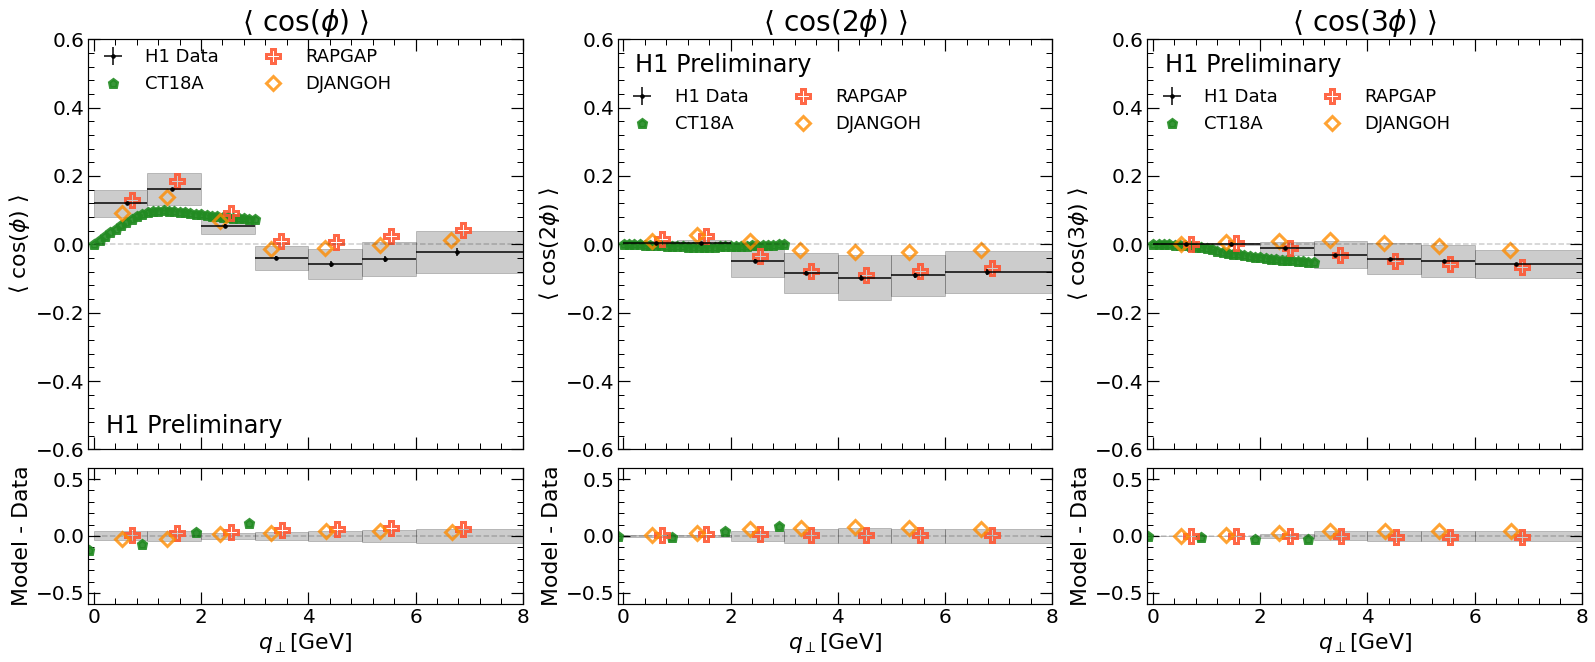

In [51]:
plot_h1rpgp = True #Default. Only one with bootstrap errors
plot_h1djgo = False #Should be false for final reporting. Is useful for dev.

plot_rapgap = True
plot_django = True

plot_pythia = False
plot_dire = False
plot_vincia = False
plot_old_pythia = False

plot_SYS = True

plot_theory = False

plot_eic = True

plot_mask = np.asarray([plot_h1rpgp,plot_h1djgo,plot_rapgap,plot_django,plot_theory,plot_pythia,plot_SYS,plot_eic])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 9), constrained_layout=True,
                         gridspec_kw={'height_ratios': [3, 1]})
axes = np.ravel(axes)

x_max = 8.0


for i in range(3):
    
    # ----- Asymmetry Plots -----
    string = r"$\langle\ \cos(%i\phi)\ \rangle$"%(i+1)
    string = string.replace("1","")
    key = "cos%i"%(i+1)
    
    axes[i].set_title(string)
    #axes[i].set_ylim(-0.4,0.5)
    axes[i].set_ylim(-0.25,0.65)
    axes[i].set_xlim(-0.1,x_max)
    axes[i].set_ylabel(string)
    axes[i].axes.set_xticklabels("")
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))


    #Omnifold H1 Data
    if (plot_h1rpgp):
        #axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],xerr=x_errors,
        #                 label="H1 OmniFold",ls='none',ms=7,marker=".", color='black',zorder=20) #When Bootstrap is RELATIVE
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key],xerr=x_errors,
                         label="H1 Data",ls='none',ms=7,marker=".", color='black',zorder=20) #ABSOLUTE Bootstrap
    if (plot_h1djgo):
        axes[i].errorbar(h1_djgo["q_perp"],h1_djgo[key],
                         label="H1 OmniFold [DJANGOH]",lw=4,ls='-',color='grey')

    #SYSTEMATICS
    if (plot_SYS):
        for xi in range(len(edges)):
            axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-systematics['total'][key][xi],
                                 h1_rpgp[key][xi]+systematics['total'][key][xi], alpha=0.2,color='k',)
            
    #GENERATORS
    if (plot_rapgap):
        offset = 0.1
        axes[i].errorbar(rapgap["q_perp"]+offset,rapgap[key],label="RAPGAP",ls='none',marker="P",
                         fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    if (plot_django):
        offset = -0.1
        axes[i].errorbar(django["q_perp"]+offset,django[key],label="DJANGOH",ls='none',marker="D",
                         #fillstyle='none',markeredgewidth=3,ms=10,alpha=1.0, color=colors[3],markeredgecolor="darkorange")
                         fillstyle='none',markeredgewidth=3,ms=10,alpha=0.8, color="darkorange")
        
    if (plot_pythia):
        offset = -0.1
        axes[i].errorbar(pythia["q_perp"]+offset,pythia[key], label="Pythia",ls='none',marker="^",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=1.0)
    if (plot_dire):
        offset = 0.1
        axes[i].errorbar(dire["q_perp"]+offset,dire[key], label="Pythia + DIRE",ls='none',marker=">",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.7)
    if (plot_vincia):
        offset = -0.1
        axes[i].errorbar(vincia["q_perp"]+offset,vincia[key], label="Pythia + Vincia",ls='none',marker="<",
                         fillstyle='none',markeredgewidth=3,ms=10, color="blueviolet")
                         #fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)
        
    if (plot_old_pythia):
        axes[i].plot(old_pythia[key+"_x"],old_pythia[key],label="OLD Pythia",
                     linewidth=4,linestyle="dashed",color='orange')

    #THEORY
    if (plot_theory):
        offset = 0.1
        axes[i].plot(theory['for_ratio_cos%i_x'%(i+1)]+offset,theory['for_ratio_cos%i'%(i+1)],label="Hatta et al.",
                 ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        
        
    if plot_eic:
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.0
        #axes[i].plot(eic_x+offset,rcbk['cos%i'%(i+1)],label="rcBK",
        #         ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        #axes[i].plot(eic_x+offset,GBW['cos%i'%(i+1)],label="GBW",
        #         ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        axes[i].plot(eic_x+offset,CT18A['cos%i'%(i+1)],label="CT18A",
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        axes[i].set_ylim(-0.6,0.6)
        
   
    # ----- RATIO PLOTS -----    
    axes[i+3].set_ylabel("Model - Data")
    axes[i+3].set_xlim(-0.1,x_max)
    axes[i+3].set_ylim(-0.25,0.25)
    axes[i+3].set_xlabel(r"$q_\perp$[GeV]")
    axes[i+3].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i+3].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    axes[i+3].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
    
    if plot_h1djgo:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        axes[i+3].errorbar(h1_rpgp["q_perp"],h1_djgo[key] - h1_rpgp[key],ls='-',lw=4,color='grey')

    if plot_SYS:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            axes[i+3].fill_between(edges[xi],-systematics['total'][key][xi],systematics['total'][key][xi], alpha=0.2,color='k',)
    
    if plot_rapgap:
        offset = 0.1
        axes[i+3].errorbar(h1_rpgp["q_perp"]+offset,rapgap[key] - h1_rpgp[key],ls='none',marker="P",
                           fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    
    if plot_django:
        offset = -0.1
        axes[i+3].errorbar(h1_djgo["q_perp"]+offset,django[key] - h1_rpgp[key],ls='none',marker="D",
                           fillstyle='none',markeredgewidth=3,ms=10,alpha=0.8, color="darkorange")
                           #fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])

    if (plot_theory):
        n_theory_points = len(theory["for_ratio_cos%i"%(i+1)])
        axes[i+3].errorbar(h1_rpgp["q_perp"][:n_theory_points],theory["for_ratio_cos%i"%(i+1)] - h1_rpgp[key][:n_theory_points],
                           ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        #axes[i+3].set_ylim(-0.6,0.6)
        
    if (plot_eic):
        n_theory_points = len(rcbk["cos%i"%(i+1)])
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.1
        
        #axes[i+3].plot(eic_x[1:]+offset,rcbk['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
        #         ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        
        #axes[i+3].plot(eic_x[1:]+offset, GBW['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
        #         ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        
        axes[i+3].plot(eic_x[0::10]+offset, CT18A['cos%i'%(i+1)][0::10] - h1_rpgp[key][:n_theory_points],
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        
        axes[i+3].set_ylim(-0.6,0.6)
        
        
    if (plot_pythia):
        offset = -0.1
        axes[i+3].errorbar(pythia["q_perp"]+offset,pythia[key] - h1_rpgp[key],ls='none',marker="^",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=1.0)
    if (plot_dire):
        offset = 0.1
        axes[i+3].errorbar(dire["q_perp"]+offset,dire[key] - h1_rpgp[key],ls='none',marker=">",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.7)
    if (plot_vincia):
        offset = -0.1
        axes[i+3].errorbar(vincia["q_perp"]+offset,vincia[key] - h1_rpgp[key],ls='none',marker="<",
                           fillstyle='none',markeredgewidth=3,ms=10, color='blueviolet')

        
        
    #Whole Plot Stuff (Legend, Text, Dashed Line at 0)
    axes[i].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
#axes[0].text(0.6,0.92,"H1 Preliminary",transform=axes[0].transAxes,fontsize=22)
axes[0].text(0.04,0.04,"H1 Preliminary",transform=axes[0].transAxes,fontsize=24)
axes[1].text(0.04,0.92,"H1 Preliminary",transform=axes[1].transAxes,fontsize=24)
axes[2].text(0.04,0.92,"H1 Preliminary",transform=axes[2].transAxes,fontsize=24)

handles, labels = axes[0].get_legend_handles_labels()
handles[1],handles[0] = handles[0],handles[1]
labels[1],labels[0] = labels[0],labels[1]
print(labels)
axes[0].legend(handles,labels,fontsize=18,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 1.018),ncol=2)
axes[1].legend(handles,labels,fontsize=18,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 0.92),ncol=2)
axes[2].legend(handles,labels,fontsize=18,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 0.92),ncol=2)

strings = np.asarray(["H1_Data","Unfolded_fromDjango","Rapgap","Django","Theory","Pythia","SYS","eic_saturation"])
strings = strings[plot_mask]
string = ""
for i,datum in enumerate(strings):
    string += datum
    if i > 0: string +="+"
string = string[:-1]

plt.savefig(string+".pdf")

### 2D Asymmetry Histograms

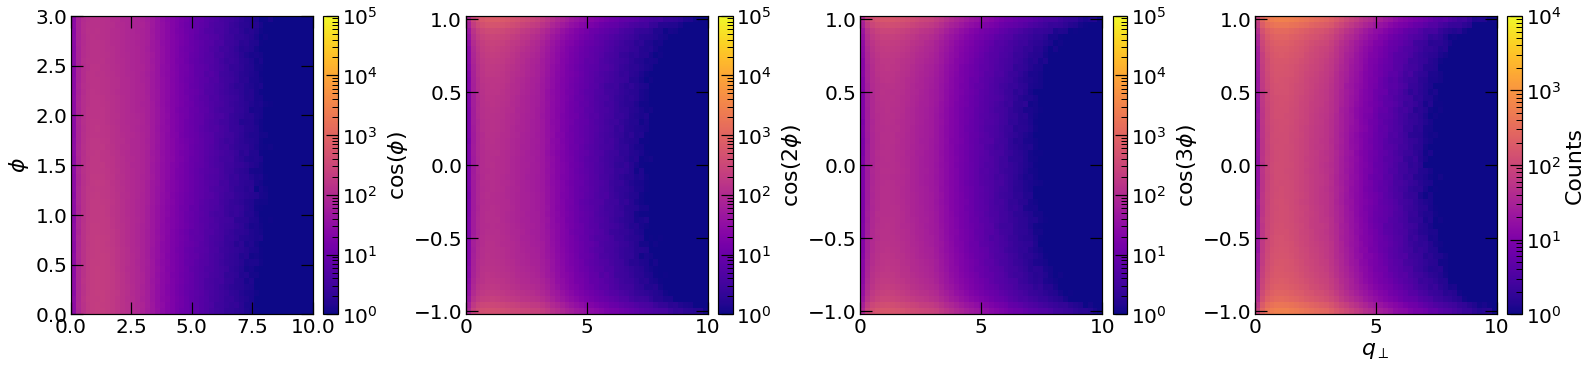

In [25]:
N_Bins = 50
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5), constrained_layout=True)


h0, xedges0, yedges0 = np.histogram2d(q_perp, (asymm_phi), bins=(np.linspace(0,10,N_Bins),np.linspace(0,3,N_Bins)), weights=weights)
h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm0 = axes[0].pcolormesh(xedges0, yedges0, h0.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm1 = axes[1].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm2 = axes[2].pcolormesh(xedges2, yedges2, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm3 = axes[3].pcolormesh(xedges3, yedges3, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[0].set_ylabel("$\phi$",fontsize=22)
axes[1].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[3].set_ylabel("$\cos(3\phi)$",fontsize=22)
#cb0=axes[0].colorbar(pcm,ax)

fig.colorbar(pcm0, ax=axes[0], pad= -0.049)
fig.colorbar(pcm1, ax=axes[1], pad= -0.01)
fig.colorbar(pcm2, ax=axes[2], pad= -0.01)
cb=fig.colorbar(pcm3, ax=axes[3], pad= -0.01)

plt.xlabel("$q_\perp$",fontsize=22)
cb.set_label("Counts",fontsize=22)
plt.savefig("2D_asymmetries.png")

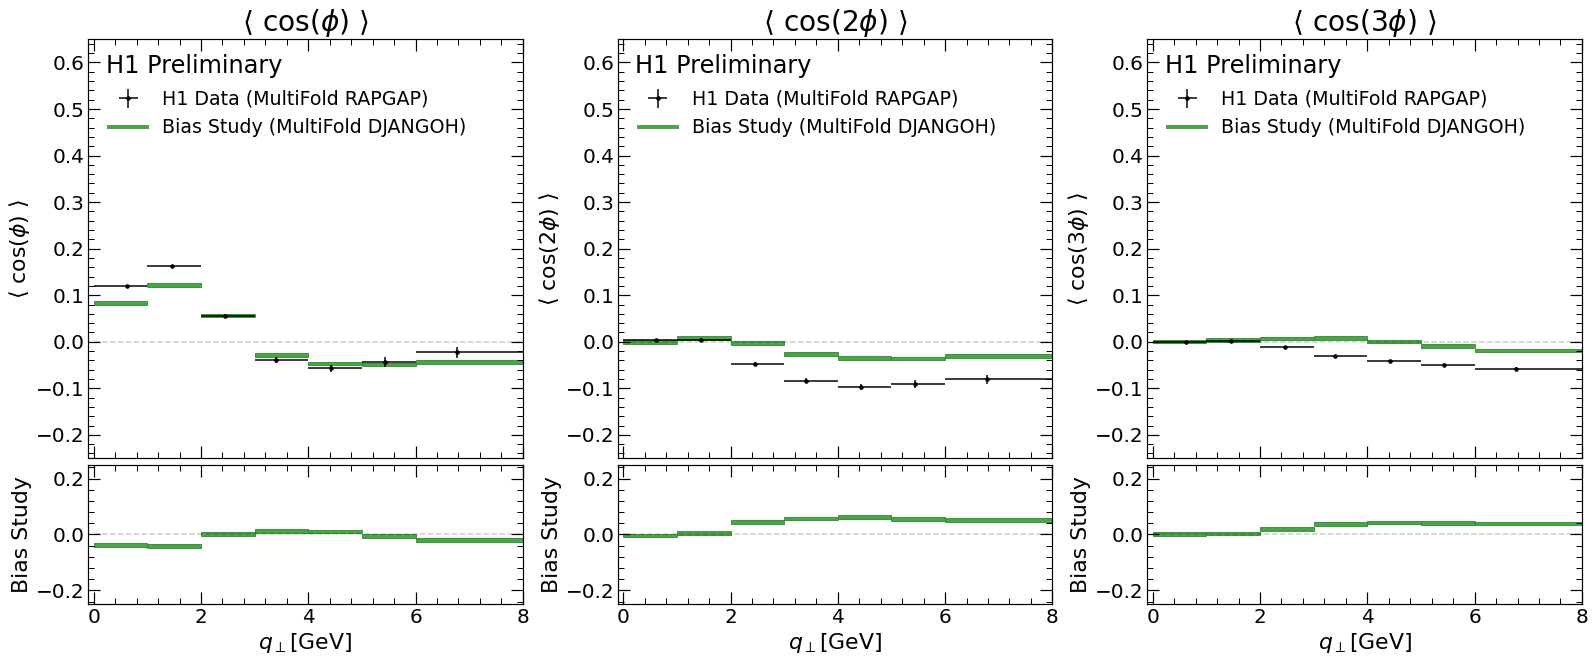

In [26]:
plot_h1rpgp = True #Default. Only one with bootstrap errors
plot_h1djgo = True #Should be false for final reporting. Is useful for dev.

plot_rapgap = False
plot_django = False

plot_pythia = False
plot_dire = False
plot_vincia = False
plot_old_pythia = False

plot_SYS = False

plot_theory = False

plot_eic = False

plot_mask = np.asarray([plot_h1rpgp,plot_h1djgo,plot_rapgap,plot_django,plot_theory,plot_pythia,plot_SYS,plot_eic])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 9), constrained_layout=True,
                         gridspec_kw={'height_ratios': [3, 1]})
axes = np.ravel(axes)

x_max = 8.0


for i in range(3):
    
    # ----- Asymmetry Plots -----
    string = r"$\langle\ \cos(%i\phi)\ \rangle$"%(i+1)
    string = string.replace("1","")
    key = "cos%i"%(i+1)
    
    axes[i].set_title(string)
    #axes[i].set_ylim(-0.4,0.5)
    axes[i].set_ylim(-0.25,0.65)
    axes[i].set_xlim(-0.1,x_max)
    axes[i].set_ylabel(string)
    axes[i].axes.set_xticklabels("")
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))


    #Omnifold H1 Data
    if (plot_h1rpgp):
        #axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],xerr=x_errors,
        #                 label="H1 OmniFold",ls='none',ms=7,marker=".", color='black',zorder=20) #When Bootstrap is RELATIVE
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key],xerr=x_errors,
                         label="H1 Data (MultiFold RAPGAP)",ls='none',ms=7,marker=".", color='black',zorder=20) #ABSOLUTE Bootstrap
    if (plot_h1djgo):
        axes[i].errorbar(-10,100,
                         label="Bias Study (MultiFold DJANGOH)",lw=4,ls='-',color='forestgreen',alpha=0.8)
        for xi in range(len(edges)):
            lower = h1_djgo[key][xi]-0.004
            upper = h1_djgo[key][xi]+0.004
            axes[i].fill_between(edges[xi],lower,upper,alpha=0.8,color='forestgreen')

    #SYSTEMATICS
    if (plot_SYS):
        for xi in range(len(edges)):
            axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-systematics['total'][key][xi],
                                 h1_rpgp[key][xi]+systematics['total'][key][xi], alpha=0.2,color='k',)
            
    #GENERATORS
    if (plot_rapgap):
        offset = 0.1
        axes[i].errorbar(rapgap["q_perp"]+offset,rapgap[key],label="RAPGAP",ls='none',marker="P",
                         fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    if (plot_django):
        offset = -0.1
        axes[i].errorbar(django["q_perp"]+offset,django[key],label="DJANGOH",ls='none',marker="D",
                         fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])
        
    if (plot_pythia):
        offset = -0.1
        axes[i].errorbar(pythia["q_perp"]+offset,pythia[key], label="Pythia",ls='none',marker="^",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.95)
    if (plot_dire):
        offset = 0.1
        axes[i].errorbar(dire["q_perp"]+offset,dire[key], label="Pythia + DIRE",ls='none',marker=">",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.6)
    if (plot_vincia):
        offset = -0.1
        axes[i].errorbar(vincia["q_perp"]+offset,vincia[key], label="Pythia + Vincia",ls='none',marker="<",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)
        
    if (plot_old_pythia):
        axes[i].plot(old_pythia[key+"_x"],old_pythia[key],label="OLD Pythia",
                     linewidth=4,linestyle="dashed",color='orange')

    #THEORY
    if (plot_theory):
        offset = 0.1
        axes[i].plot(theory['for_ratio_cos%i_x'%(i+1)]+offset,theory['for_ratio_cos%i'%(i+1)],label="Hatta, et al.",
                 ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        axes[i].set_ylim(-0.25,0.6)
        
        
    if plot_eic:
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.1
        axes[i].plot(eic_x+offset,rcbk['cos%i'%(i+1)],label="rcBK",
                 ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        axes[i].plot(eic_x+offset,GBW['cos%i'%(i+1)],label="GBW",
                 ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        axes[i].plot(eic_x+offset,CT18A['cos%i'%(i+1)],label="CT18A",
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        axes[i].set_ylim(-0.6,0.6)
        
   
    #Whole Plot Stuff (Legend, Text, Dashed Line at 0)
    axes[i].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)    
    axes[i].legend(fontsize=19,frameon=False,bbox_to_anchor=(0.91, 0.92))
    axes[i].text(0.04,0.92,"H1 Preliminary",transform=axes[i].transAxes,fontsize=24)


    # ----- RATIO PLOTS -----    
    axes[i+3].set_ylabel("Bias Study")
    axes[i+3].set_xlim(-0.1,x_max)
    axes[i+3].set_ylim(-0.25,0.25)
    axes[i+3].set_xlabel(r"$q_\perp$[GeV]")
    axes[i+3].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i+3].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    axes[i+3].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
    
    if plot_h1djgo:
        model_difference = h1_rpgp[key]-h1_djgo[key]
        #axes[i+3].errorbar(h1_rpgp["q_perp"],h1_djgo[key] - h1_rpgp[key],ls='-',lw=4,color='forestgreen')
        for xi in range(len(edges)):
            lower = h1_djgo[key][xi]-h1_rpgp[key][xi]-0.007
            upper = h1_djgo[key][xi]-h1_rpgp[key][xi]+0.007
            axes[i+3].fill_between(edges[xi], lower, upper, alpha=0.8,color='forestgreen')



    if plot_SYS:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            axes[i+3].fill_between(edges[xi],-systematics['total'][key][xi],systematics['total'][key][xi], alpha=0.2,color='k',)
    
    if plot_rapgap:
        offset = 0.1
        axes[i+3].errorbar(h1_rpgp["q_perp"]+offset,rapgap[key] - h1_rpgp[key],ls='none',marker="P",
                           fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    
    if plot_django:
        offset = -0.1
        axes[i+3].errorbar(h1_djgo["q_perp"]+offset,django[key] - h1_rpgp[key],ls='none',marker="D",
                           fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])

    if (plot_theory):
        n_theory_points = len(theory["for_ratio_cos%i"%(i+1)])
        axes[i+3].errorbar(h1_rpgp["q_perp"][:n_theory_points],theory["for_ratio_cos%i"%(i+1)] - h1_rpgp[key][:n_theory_points],
                           ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        axes[i+3].set_ylim(-0.6,0.6)
        
    if (plot_eic):
        n_theory_points = len(rcbk["cos%i"%(i+1)])
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.1
        
        axes[i+3].plot(eic_x[1:]+offset,rcbk['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        
        axes[i+3].plot(eic_x[1:]+offset, GBW['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        
        axes[i+3].plot(eic_x[1:]+offset, CT18A['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        
        axes[i+3].set_ylim(-0.6,0.6)
        
        
    if (plot_pythia):
        offset = -0.1
        axes[i+3].errorbar(pythia["q_perp"]+offset,pythia[key] - h1_rpgp[key],ls='none',marker="^",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.95)
    if (plot_dire):
        offset = 0.1
        axes[i+3].errorbar(dire["q_perp"]+offset,dire[key] - h1_rpgp[key],ls='none',marker=">",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.6)
    if (plot_vincia):
        offset = -0.1
        axes[i+3].errorbar(vincia["q_perp"]+offset,vincia[key] - h1_rpgp[key],ls='none',marker="<",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)



strings = np.asarray(["H1_Data","Unfolded_fromDjango","Rapgap","Django","Theory","Pythia","model_SYS","eic_saturation"])
strings = strings[plot_mask]
string = ""
for i,datum in enumerate(strings):
    string += datum
    if i > 0: string +="+"
string = string[:-1]

plt.savefig("bias_study_asymmetry.pdf")